# Ocorrencia com Todas as Aves

Nesse Notebook trabalharemos somente com as ocorrencias que estiverem associadas aos atropelamento de Aves e Faixas de Kilometros.
Iniciaremos importando os dados ja corrigidos previamente e as bibliotecas.

In [15]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dc = pd.read_csv('dadoscorrigidos.csv')
tbanimal = pd.read_csv('animal.csv')

In [16]:
dc.head(10)

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Taxonomia,Ave,Mamifero,Reptil,Anfibio
0,5,334,2,1,0,0,0,0,0,0,1,5,3,1,0,0,0
1,5,1,2,1,0,0,0,0,0,0,1,6,3,1,0,0,0
2,5,18,4,1,1,0,1,0,0,0,1,6,3,1,0,0,0
3,5,361,4,1,1,0,0,0,0,0,1,5,3,1,0,0,0
4,4,48,4,1,0,0,1,0,0,0,1,5,3,1,0,0,0
5,2,329,4,1,0,0,1,1,0,0,1,6,3,1,0,0,0
6,2,286,4,1,1,1,1,0,1,1,0,6,3,1,0,0,0
7,4,362,4,1,0,0,0,0,1,0,1,5,1,0,0,0,1
8,5,363,2,1,0,0,0,0,0,0,1,6,4,0,1,0,0
9,4,364,4,1,1,0,0,0,0,0,1,6,4,0,1,0,0


Agora removeremos todos os atributos que não forem relevantes para as ocorrencias com as aves.

In [25]:
avedc = dc.drop(['Taxonomia','codAnimal', 'Mamifero', 'Reptil', 'Anfibio'], axis=1)
avedc.head()

,FaixaKm,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Ave
0,5,2,1,0,0,0,0,0,0,1,5,1
1,5,2,1,0,0,0,0,0,0,1,6,1
2,5,4,1,1,0,1,0,0,0,1,6,1
3,5,4,1,1,0,0,0,0,0,1,5,1
4,4,4,1,0,0,1,0,0,0,1,5,1


Em seguida é demonstrado o grafico de correlação de atributos de pearson

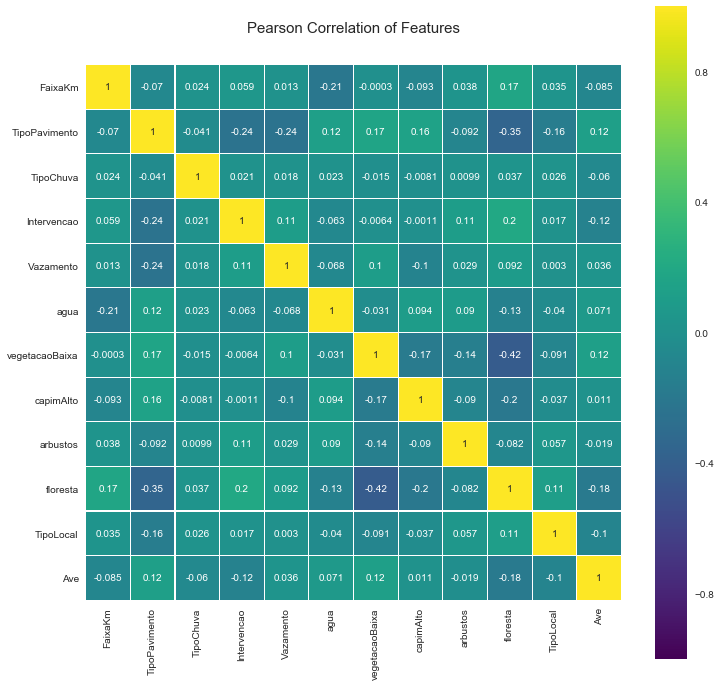

In [18]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(avedc.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Em seguida alteramos os dados para que cada dado de uma ocorrencia esteja associada a seu respectivo atributo.

In [23]:
aveasc = avedc
headers = ['FaixaKm','TipoPavimento','TipoChuva','Intervencao',
           'Vazamento','agua','vegetacaoBaixa','capimAlto','arbustos','floresta','TipoLocal','Ave']
for i in range(len(headers)):
    aveasc[headers[i]] = headers[i]+'='+aveasc[headers[i]].apply(str)

aveasc.head()

,FaixaKm,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Ave
0,FaixaKm=5,TipoPavimento=2,TipoChuva=1,Intervencao=0,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,Ave=1
1,FaixaKm=5,TipoPavimento=2,TipoChuva=1,Intervencao=0,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=6,Ave=1
2,FaixaKm=5,TipoPavimento=4,TipoChuva=1,Intervencao=1,Vazamento=0,agua=1,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=6,Ave=1
3,FaixaKm=5,TipoPavimento=4,TipoChuva=1,Intervencao=1,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,Ave=1
4,FaixaKm=4,TipoPavimento=4,TipoChuva=1,Intervencao=0,Vazamento=0,agua=1,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,Ave=1


Enfim aplicaremos o Apriori usando suporte minimo de 0.03 e confianca de 0.8

In [7]:
listaveasc = []
for i in range(len(aveasc)):
    listaveasc.append([str(aveasc.values[i, j]) for j in range(0, 12)])

from apyori import apriori
regras = apriori(listaveasc, min_support=0.03, min_confidence=0.8, min_lenght=2)

resultados = list(regras)
resultados2 = [list(x) for x in resultados]
resultadosFormatado = []
for j in range(0,1000):#numero de regras que deseja mostrar
       resultadosFormatado.append([list(x) for x in resultados2[j][2]])
resultdf = pd.DataFrame(resultadosFormatado)
resultdf.to_csv('averegras.csv', index=False, header=False)

|SE|E|ENTÃO|SUPORTE|LIFT|
|:---|:---|:---|:---|
|FaixaKm=1|Ave=1|Intervencao=0|0.989090909090909|1.2048074408751634|
|FaixaKm=1|Ave=1|TipoChuva=1|0.9745454545454546|1.0186976466745252|
|FaixaKm=1|Ave=1|TipoLocal=5|0.8054545454545454|1.28377712330547|
|FaixaKm=1|Ave=1|TipoPavimento=4|0.9836363636363636|1.1807518674364745|
|FaixaKm=1|Ave=1|floresta=0|0.9709090909090908|1.7167951182010375|
|FaixaKm=2|Ave=1|Intervencao=0|0.9738219895287958|1.1862084347236799|
|FaixaKm=2|Ave=1|TipoChuva=1|0.9869109947643979|1.031623412899326|
|FaixaKm=2|Ave=1|TipoPavimento=4|0.9869109947643979|1.1846827172530654|
|FaixaKm=2|Ave=1|floresta=0|0.8534031413612565|1.5090170240085008|
|Ave=1|FaixaKm=3|Intervencao=0|0.9706666666666667|1.1823649493294497|
|Ave=1|FaixaKm=3|TipoChuva=1|0.9786666666666667|1.0230055720460345|
|Ave=1|FaixaKm=3|TipoLocal=5|0.8026666666666666|1.2793336509448943|
|Ave=1|FaixaKm=3|TipoPavimento=4|0.9893333333333333|1.1875904796077024|
|FaixaKm=4|Ave=1|Intervencao=0|0.8821917808219178|1.0745940661713913|
|FaixaKm=4|Ave=1|TipoChuva=1|0.9698630136986303|1.013803065873697|
|FaixaKm=4|Ave=1|TipoPavimento=4|0.9342465753424658|1.1214646278465086|
|FaixaKm=4|Ave=1|capimAlto=0|0.863013698630137|1.0626471581770789|
|FaixaKm=5|Ave=1|TipoChuva=1|0.9463955637707948|0.9892724132464283|
|FaixaKm=5|Ave=1|agua=0|0.8114602587800369|1.1440119240407138|
|FaixaKm=5|Ave=1|capimAlto=0|0.878003696857671|1.0811046624355312|
|FaixaKm=9|Ave=1|Intervencao=0|0.9962121212121213|1.2134817591535234|
|FaixaKm=9|Ave=1|TipoChuva=1|0.9734848484848485|1.0175889894097987|
|FaixaKm=9|Ave=1|TipoPavimento=4|0.9886363636363636|1.1867538408846268|
|FaixaKm=9|Ave=1|capimAlto=0|0.8636363636363636|1.0634138588684043|
|FaixaKm=9|Ave=1|floresta=0|0.8484848484848485|1.500320328015888|


# Ocorrencias com a Ave mais Atropelada

Para trabalharmos somente com as Aves mais atropeladas precisamos primeiro remover as ocorrencias dos outros animais.

In [53]:
avedc = dc.drop(['Taxonomia', 'Mamifero', 'Reptil', 'Anfibio'], axis=1)
avedc = avedc[avedc.Ave == 1]
avedc.head()

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Ave
0,5,334,2,1,0,0,0,0,0,0,1,5,1
1,5,1,2,1,0,0,0,0,0,0,1,6,1
2,5,18,4,1,1,0,1,0,0,0,1,6,1
3,5,361,4,1,1,0,0,0,0,0,1,5,1
4,4,48,4,1,0,0,1,0,0,0,1,5,1


Em seguida selecionaremos os animais com maiores numeros de ocorrencia

In [54]:
avedc.groupby('codAnimal').size().sort_values(ascending=False).head(3)

codAnimal
14     233
32     200
242    150
dtype: int64

Agora iremos na tabela dos animais identificar qual é o animal mais atropelado

In [55]:
tbanimal[tbanimal.codAnimal == 14]

,codAnimal,nomeComum,nomeCientifico,codGrupoTax,codValorBiologico
13,14,anú-preto,Crotophaga ani,3,0


Agora que ja identificamos o nome do animal mais atropelado, criaremos uma tributo novo separando qual é a ave mais atropelada e qual não é

In [56]:
avedc['AnuPreto'] = (avedc['codAnimal'] == 14)*1
avedc.head()

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Ave,AnuPreto
0,5,334,2,1,0,0,0,0,0,0,1,5,1,0
1,5,1,2,1,0,0,0,0,0,0,1,6,1,0
2,5,18,4,1,1,0,1,0,0,0,1,6,1,0
3,5,361,4,1,1,0,0,0,0,0,1,5,1,0
4,4,48,4,1,0,0,1,0,0,0,1,5,1,0


Correlação de Pearson para os atributos e o Anú-Preto

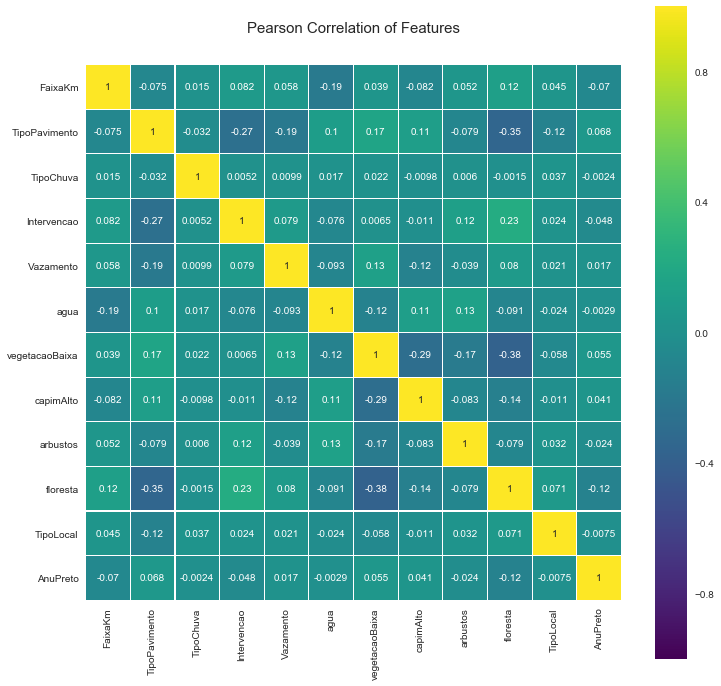

In [57]:
anudc = avedc.drop(['codAnimal', 'Ave'], axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(anudc.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Fazendo a mesma associação entre os dados e os atributos

In [58]:
headers = ['FaixaKm','TipoPavimento','TipoChuva','Intervencao',
           'Vazamento','agua','vegetacaoBaixa','capimAlto','arbustos','floresta','TipoLocal','AnuPreto']
for i in range(len(headers)):
    anudc[headers[i]] = headers[i]+'='+anudc[headers[i]].apply(str)

anudc.head()

,FaixaKm,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,AnuPreto
0,FaixaKm=5,TipoPavimento=2,TipoChuva=1,Intervencao=0,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,AnuPreto=0
1,FaixaKm=5,TipoPavimento=2,TipoChuva=1,Intervencao=0,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=6,AnuPreto=0
2,FaixaKm=5,TipoPavimento=4,TipoChuva=1,Intervencao=1,Vazamento=0,agua=1,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=6,AnuPreto=0
3,FaixaKm=5,TipoPavimento=4,TipoChuva=1,Intervencao=1,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,AnuPreto=0
4,FaixaKm=4,TipoPavimento=4,TipoChuva=1,Intervencao=0,Vazamento=0,agua=1,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,AnuPreto=0


Aplicamos um apriori com as mesmas configurações para todas as Aves.

In [61]:
listanu = []
for i in range(len(anudc)):
    listanu.append([str(anudc.values[i, j]) for j in range(0, 12)])

from apyori import apriori
regras = apriori(listanu, min_support=0.03, min_confidence=0.8, min_lenght=2)

resultados = list(regras)
resultados2 = [list(x) for x in resultados]
resultadosFormatado = []
for j in range(0,3000):#numero de regras que deseja mostrar
       resultadosFormatado.append([list(x) for x in resultados2[j][2]])
resultdf = pd.DataFrame(resultadosFormatado)
resultdf.to_csv('anuregras.csv', index=False, header=False)

Porem por mais que aumentemos a quantidade de regras não foi possivel achar nenhuma associação entre o Anú-Preto e as Faixas de Km